### cw_separation

- This notebook takes a look at making some plots having associated galaxies with certain cw morphological features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import catalog
import catalog_init 
import catalog_process
import catalog_plot
import copy

# plotting defaults.
from matplotlib.pyplot import rcParams
catalog_plot.default(rcParams)

In [2]:
basepath = '/Users/chrisduckworth/astronomy/projects/spin_bias/catalogues/'
outpath = '/Users/chrisduckworth/astronomy/projects/spin_bias/plots/cosmo_web_split/'

# initiating catalog class objects.
total = catalog.Catalog(basepath)

# matching to cw definitions and selecting centrals only.
total.match_to_cw(basepath)
total.remove_satellites()

# creating copies of these objects and cutting on morphology.
ltgs = copy.deepcopy(total) 
ltgs.select_morphology('ltg')

etgs = copy.deepcopy(total) 
etgs.select_morphology('etg')

unclassified = copy.deepcopy(total)
unclassified.select_morphology('unclassified')

/Users/chrisduckworth/astronomy/projects/spin_bias/scripts/catalog_init.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab['stellar_to_halo_ratio'] = np.log10(tab.nsa_elpetro_mass.values) -  tab.halo_mass_stel.values


In [3]:
# creating copies for different cw environments. this seems way more complex than before...

total_no_cw = copy.deepcopy(total) 
total_filament = copy.deepcopy(total) 
total_node = copy.deepcopy(total) 

total_no_cw.select_cw_enviro(feature='no_cw', node_dist=2, filament_dist=2)
total_filament.select_cw_enviro(feature='filament', node_dist=2, filament_dist=1.5)
total_node.select_cw_enviro(feature='node', node_dist=1)

ltgs_no_cw = copy.deepcopy(ltgs) 
ltgs_filament = copy.deepcopy(ltgs) 
ltgs_node = copy.deepcopy(ltgs) 

ltgs_no_cw.select_cw_enviro(feature='no_cw', node_dist=2, filament_dist=2)
ltgs_filament.select_cw_enviro(feature='filament', node_dist=2, filament_dist=1.5)
ltgs_node.select_cw_enviro(feature='node', node_dist=1)

etgs_no_cw = copy.deepcopy(etgs) 
etgs_filament = copy.deepcopy(etgs) 
etgs_node = copy.deepcopy(etgs) 

etgs_no_cw.select_cw_enviro(feature='no_cw', node_dist=2, filament_dist=2œ
etgs_filament.select_cw_enviro(feature='filament', node_dist=2, filament_dist=1.5)
etgs_node.select_cw_enviro(feature='node', node_dist=1)

unclassified_no_cw = copy.deepcopy(unclassified) 
unclassified_filament = copy.deepcopy(unclassified) 
unclassified_node = copy.deepcopy(unclassified) 

unclassified_no_cw.select_cw_enviro(feature='no_cw', node_dist=2, filament_dist=2)
unclassified_filament.select_cw_enviro(feature='filament', node_dist=2, filament_dist=1.5)
unclassified_node.select_cw_enviro(feature='node', node_dist=1)

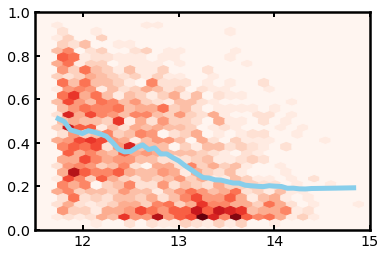

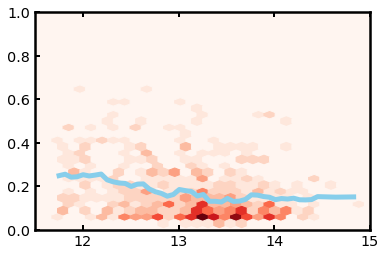

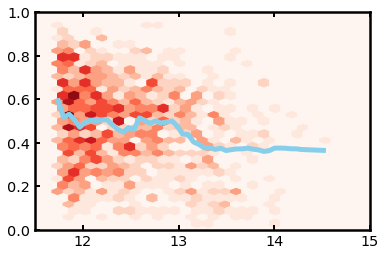

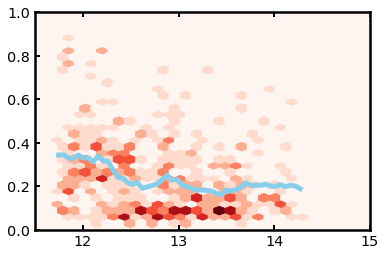

In [7]:
# defining expected function for overall populations.
fraction = 0.1 # rolling mean contains 5% of total points.

p_total = total.compute_expected_y("halo_mass_stel", "lambda_re", method="running_mean", return_plot=True, n_neighbours=int(fraction*total.df.shape[0]))
p_etgs = etgs.compute_expected_y("halo_mass_stel", "lambda_re", method="running_mean", return_plot=True, n_neighbours=int(fraction*etgs.df.shape[0]))
p_ltgs = ltgs.compute_expected_y("halo_mass_stel", "lambda_re", method="running_mean", return_plot=True, n_neighbours=int(fraction*ltgs.df.shape[0]))
p_unclassified = unclassified.compute_expected_y("halo_mass_stel", "lambda_re", method="running_mean", return_plot=True, n_neighbours=int(fraction*unclassified.df.shape[0]))


/Users/chrisduckworth/astronomy/projects/spin_bias/scripts/catalog_plot.py:167: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax.errorbar(x_medians, y_medians, yerr=y_error, marker='H', markersize=5, capsize=5, alpha=0.75, color=colors[0], label=label)
/opt/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


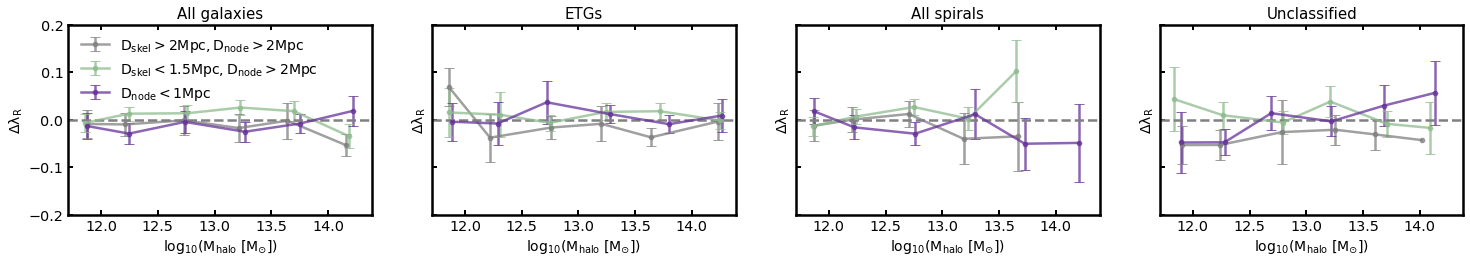

In [21]:
x_bins = np.array([12, 12.5, 13, 13.5, 14]) 
z_percentiles = np.array([])
z_percentile_labels = None

fig, ax = plt.subplots(1,4, figsize=(25, 3.5), sharex='all', sharey='all')

## all galaxies.
total_no_cw.plot_binned_percentiles_three_props_residuals("halo_mass_stel", "lambda_re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{D_{skel} > 2Mpc, D_{node} > 2Mpc}$', p_total, ax[0], colors=['grey'], extrema=True)
total_filament.plot_binned_percentiles_three_props_residuals("halo_mass_stel", "lambda_re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{D_{skel} < 1.5Mpc, D_{node} > 2Mpc}$', p_total, ax[0], colors=['darkseagreen'], extrema=True)
total_node.plot_binned_percentiles_three_props_residuals("halo_mass_stel", "lambda_re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{D_{node} < 1Mpc}$', p_total, ax[0], colors=['rebeccapurple'], extrema=True)

## etgs
etgs_no_cw.plot_binned_percentiles_three_props_residuals("halo_mass_stel", "lambda_re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{D_{skel} > 2Mpc, D_{node} > 2Mpc}$', p_etgs, ax[1], colors=['grey'], extrema=True)
etgs_filament.plot_binned_percentiles_three_props_residuals("halo_mass_stel", "lambda_re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{D_{skel} < 1.5Mpc, D_{node} > 2Mpc}$', p_etgs, ax[1], colors=['darkseagreen'], extrema=True)
etgs_node.plot_binned_percentiles_three_props_residuals("halo_mass_stel", "lambda_re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{D_{node} < 1Mpc}$', p_etgs, ax[1], colors=['rebeccapurple'], extrema=True)

## ltgs
ltgs_no_cw.plot_binned_percentiles_three_props_residuals("halo_mass_stel", "lambda_re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{D_{skel} > 2Mpc, D_{node} > 2Mpc}$', p_ltgs, ax[2], colors=['grey'], extrema=True)
ltgs_filament.plot_binned_percentiles_three_props_residuals("halo_mass_stel", "lambda_re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{D_{skel} < 1.5Mpc, D_{node} > 2Mpc}$', p_ltgs, ax[2], colors=['darkseagreen'], extrema=True)
ltgs_node.plot_binned_percentiles_three_props_residuals("halo_mass_stel", "lambda_re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{D_{node} < 1Mpc}$', p_ltgs, ax[2], colors=['rebeccapurple'], extrema=True)

## unclassified
unclassified_no_cw.plot_binned_percentiles_three_props_residuals("halo_mass_stel", "lambda_re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{D_{skel} > 2Mpc, D_{node} > 2Mpc}$', p_unclassified, ax[3], colors=['grey'], extrema=True)
unclassified_filament.plot_binned_percentiles_three_props_residuals("halo_mass_stel", "lambda_re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{D_{skel} < 1.5Mpc, D_{node} > 2Mpc}$', p_unclassified, ax[3], colors=['darkseagreen'], extrema=True)
unclassified_node.plot_binned_percentiles_three_props_residuals("halo_mass_stel", "lambda_re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{D_{node} < 1Mpc}$', p_unclassified, ax[3], colors=['rebeccapurple'], extrema=True)

titles = ['All galaxies', 'ETGs', 'All spirals', 'Unclassified']
for ind, axis in enumerate(ax):
    axis.axhline(0, color='grey', linestyle='dashed')
    axis.set_ylabel("$\mathrm{\Delta\lambda_R}$", fontsize=14)
    axis.set_xlabel("$\mathrm{log_{10}(M_{halo} \; [M_{\odot}])}$", fontsize=14)
    axis.set_title(titles[ind], fontsize=15)

ax[0].legend(frameon=False, fontsize=14)
ax[0].set_ylim([-0.2,0.2])
plt.savefig(outpath+'lambdaR_mhalo-cw_split_residuals.pdf')
